# Прогнозирование месячной инфляции в России

Перед нами стоит задача в **создании модели, способоной предсказывать данные по месячной инфляции в России.**

В проекте будут использоваться **следующие показатели**, данные с 2000 по 2025 года: <br>
-Данные по месячной инфляции в России <br>
-Отношения рубля к доллару(USDRUB) <br>
-Цена фьчерса на нефть марки Brent <br>
-Значения индекса московской биржи (MOEX) <br>
-Данные индекса промышленного производства <br>
-Денежная масса М2 <br>
-Индекс волатильности Российского рынка(RVI) <br>

Вы можете заметить, что я использовал два параметра, связанные с фондовым рынком. Это связано с тем, что я видел теорию о том, что фондовые рынки являются опережающим индикатор для экомоики страны.
Не могу сказать, что этих данных достаточно для построение алгоритма, в достоверности работы которого можно быть уверенным на 100%, но как мимниум он должен быть точнее, чем просто прогнозирование инфляции, опираясь только на исторические данные. 

**План работы:**<br>
1.Получение данных за период 2000 - 2025 года (некоторые данные уже получены и обработаны, прошлая версия проекта не сохранилась). <br>
2.Визуальный анализ данных (сможем ли мы найти зависимости между параметрами). <br>
3.Проверка параметров на корреляцию. <br>
4.Подбор модели в Orange и ее построение. <br>

## Получение и обработка данных

На этом этапе мы соберем данные и приведем к единому формату, использующиеся в проекте.

### Получение данных по месячной инфляции

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
monthly_iflation_rate = pd.read_csv('russian_monthly_iflation_ratio_2000_2025.csv')
monthly_iflation_rate = monthly_iflation_rate.rename(columns={'Дата': 'Date', 'Инфляция': 'Inflation'})
print(monthly_iflation_rate.head())
print(monthly_iflation_rate.info())

         Date  Inflation
0  2000-01-01       2.33
1  2000-02-01       1.04
2  2000-03-01       0.64
3  2000-04-01       0.89
4  2000-05-01       1.75
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       312 non-null    object 
 1   Inflation  302 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.0+ KB
None


### Получение данных по стомости нефти марки Brent

In [3]:
brent_price = pd.read_csv('brent_price_2000_2025.csv')
print(brent_price.head())
print(brent_price.info())

         Date  Price
0  2000-02-01  28.09
1  2000-03-01  24.77
2  2000-04-01  23.89
3  2000-05-01  28.31
4  2000-06-01  30.57
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    303 non-null    object 
 1   Price   303 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.9+ KB
None


### Получение данных о стоимости индекса Мосбиржи

In [4]:
moex_price = pd.read_csv('moex_data_2000_2025.csv')
moex_price['Price'] = moex_price['Price'].str.replace(',', '')
moex_price['Price'] = pd.to_numeric(moex_price['Price'], errors='coerce')
print(moex_price.head())
print(moex_price.info())

         Date   Price
0  2000-01-01  188.81
1  2000-02-01  191.49
2  2000-03-01  254.68
3  2000-04-01  242.85
4  2000-05-01  217.05
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    304 non-null    object 
 1   Price   304 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.9+ KB
None


### Получение ценовых данным об отношении рубля к доллару

In [5]:
usd_rub = pd.read_csv('usd_rub_2000_2025.csv')
print(usd_rub.head())
print(usd_rub.info())

         Date   Price
0  2000-02-01  28.705
1  2000-03-01  28.660
2  2000-04-01  28.445
3  2000-05-01  28.252
4  2000-06-01  28.075
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    303 non-null    object 
 1   Price   303 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.9+ KB
None


### Значения денежной массы M2

К сожалению, мне не удалось найти полных данных с 2000 по 2025 год, придется соеденять данные из разных источников

In [6]:
money_supply_M2_2000_2017_05 = pd.read_csv('Downloads/MYAGM2RUM189N.csv')
money_supply_M2_2000_2017_05.head(10)

,observation_date,MYAGM2RUM189N
0,2000-01-01,709600000000
1,2000-02-01,742000000000
2,2000-03-01,768400000000
3,2000-04-01,802500000000
4,2000-05-01,850100000000
5,2000-06-01,905800000000
6,2000-07-01,950500000000
7,2000-08-01,977600000000
8,2000-09-01,1008800000000
9,2000-10-01,1016400000000


In [7]:
money_supply_M2_2000_2017_05 = money_supply_M2_2000_2017_05.rename(columns={'observation_date': 'Date', 'MYAGM2RUM189N': 'money_supply'})

money_supply_M2_2000_2017_05['Date'] = pd.to_datetime(money_supply_M2_2000_2017_05['Date'])
money_supply_M2_2000_2016 = money_supply_M2_2000_2017_05[money_supply_M2_2000_2017_05['Date'].dt.year <= 2016]
print(money_supply_M2_2000_2016.tail(10))

money_supply_M2_2000_2016 = money_supply_M2_2000_2016.copy()
money_supply_M2_2000_2016['money_supply'] = (money_supply_M2_2000_2016['money_supply'] / 1000000000000).round(2)
money_supply_M2_2000_2016.tail(10)

          Date    money_supply
194 2016-03-01  34698700000000
195 2016-04-01  35113100000000
196 2016-05-01  35650500000000
197 2016-06-01  35867900000000
198 2016-07-01  36039000000000
199 2016-08-01  36194400000000
200 2016-09-01  36148800000000
201 2016-10-01  36051000000000
202 2016-11-01  36433000000000
203 2016-12-01  38417900000000


,Date,money_supply
194,2016-03-01,34.70
195,2016-04-01,35.11
196,2016-05-01,35.65
197,2016-06-01,35.87
198,2016-07-01,36.04
199,2016-08-01,36.19
200,2016-09-01,36.15
201,2016-10-01,36.05
202,2016-11-01,36.43
203,2016-12-01,38.42


Обрезал данные в датасете до 2016 года, переименовал колонки, убрал формат триллионов.

In [8]:
money_supply_M2_2017_2025_M2 = pd.read_csv('Downloads/M2_2017_2020 - Лист1.csv')
money_supply_M2_2017_2025_M2['Date'] = pd.to_datetime(money_supply_M2_2017_2025_M2['Date'])

money_supply_M2_2017_2025_M2.tail(10)

,Date,money_supply
88,2024-05-01,102.52
89,2024-06-01,103.56
90,2024-07-01,104.35
91,2024-08-01,106.24
92,2024-09-01,107.63
93,2024-10-01,108.95
94,2024-11-01,111.03
95,2024-12-01,117.26
96,2025-01-01,116.58
97,2025-02-01,117.70


Сейчас нам нужно соеденить две эти таблицы, чтобы получить полноценный датасет с данными за 2000 - 2025 год

In [9]:
money_supply_M2_2000_2025 = pd.concat([money_supply_M2_2000_2016, money_supply_M2_2017_2025_M2])
money_supply_M2_2000_2025.tail(10)

,Date,money_supply
88,2024-05-01,102.52
89,2024-06-01,103.56
90,2024-07-01,104.35
91,2024-08-01,106.24
92,2024-09-01,107.63
93,2024-10-01,108.95
94,2024-11-01,111.03
95,2024-12-01,117.26
96,2025-01-01,116.58
97,2025-02-01,117.70


### Индекс промышленного производства

Тут тоже предстоит проделать работу над данными, знаяения разбиты на несколько файлов, их нужно будет объеденить и дособрать остальные данные вручную.

In [10]:

russia_ipi_2000_2025 = pd.read_csv('Downloads/Ipi_2000_2025 - Лист1 (1).csv', parse_dates = ['Date'])

russia_ipi_2000_2025['IPI_percent_change'] = None

for year in range(2001, 2020):
    for month in range(1, 13):
        current_value = russia_ipi_2000_2025[(russia_ipi_2000_2025['Date'].dt.year == year) & (russia_ipi_2000_2025['Date'].dt.month == month)]['Ipi']
        previous_value = russia_ipi_2000_2025[(russia_ipi_2000_2025['Date'].dt.year == year - 1) & (russia_ipi_2000_2025['Date'].dt.month == month)]['Ipi']
        
        if not current_value.empty and not previous_value.empty:
            current = float(str(current_value.values[0]).replace(',', '.'))
            previous = float(str(previous_value.values[0]).replace(',', '.'))
            percent_change = ((current / previous) - 1) * 100
            russia_ipi_2000_2025.loc[(russia_ipi_2000_2025['Date'].dt.year == year) & (russia_ipi_2000_2025['Date'].dt.month == month), 'IPI_percent_change'] = percent_change

russia_ipi_2000_2025.loc[russia_ipi_2000_2025['Date'].dt.year >= 2020, 'IPI_percent_change'] = russia_ipi_2000_2025.loc[russia_ipi_2000_2025['Date'].dt.year >= 2020, 'Ipi'] 

russia_ipi_2000_2025 = russia_ipi_2000_2025.drop(columns=['Ipi'])

russia_ipi_2001_2025 = russia_ipi_2000_2025[russia_ipi_2000_2025['Date'].dt.year > 2000]

russia_ipi_2001_2025 = russia_ipi_2001_2025.reset_index(drop=True)

print(russia_ipi_2001_2025.head(10))
russia_ipi_2001_2025.to_csv('russia_ipi_2001_2025', index=False)

        Date IPI_percent_change
0 2001-01-01           0.434783
1 2001-02-01           0.601504
2 2001-03-01           2.384292
3 2001-04-01          -5.449591
4 2001-05-01           6.965944
5 2001-06-01           4.268293
6 2001-07-01           4.848485
7 2001-08-01           4.154303
8 2001-09-01           4.747774
9 2001-10-01           6.703911


Пришлось перевести данные в процетное соотношение изменение показателя год к году, пришлось отбросить данные за 2000 год, так как  индекс ИПП начал расчитываться только с 2000 года, не было возможности восставновить эти данные. Придется строить модель на данных с 2001 по 2025 года.

### Индекс волатильности Российского рынка

Индекс волатильности Российского рынка придется расчитать самому, основываясь на показателях месячного графика RTSI/

In [11]:
rtsi_month = pd.read_csv('PycharmProjects/Algoritmic_Trading/RTSI_combined_2023_2025.csv', usecols=['time', 'close'])
rtsi_month = rtsi_month.rename(columns={'time': 'Date'})

rtsi_month['Date'] = pd.to_datetime(rtsi_month['Date'])
rtsi_month['Date'] = rtsi_month['Date'].dt.date
print(rtsi_month.head(10))

window = 12
rtsi_month["Returns"] = np.log(rtsi_month["close"] / rtsi_month["close"].shift(1))

rtsi_month["Volatility"] = rtsi_month["Returns"].rolling(window).std() * np.sqrt(12) * 100 

rtsi_month = rtsi_month.dropna()
rtsi_month = rtsi_month.reset_index(drop=True)

rvi = rtsi_month.drop(columns=['Returns', 'close'])

print(rvi.head())
print(rvi.tail())

         Date   close
0  2000-01-01  172.31
1  2000-02-01  170.93
2  2000-03-01  231.88
3  2000-04-01  226.87
4  2000-05-01  190.21
5  2000-06-01  171.40
6  2000-07-01  194.09
7  2000-08-01  239.99
8  2000-09-01  199.08
9  2000-10-01  189.00
         Date  Volatility
0  2001-01-01   61.474373
1  2001-02-01   61.697244
2  2001-03-01   52.080819
3  2001-04-01   52.861501
4  2001-05-01   52.181679
           Date  Volatility
287  2024-12-01   32.608009
288  2025-01-01   33.101314
289  2025-02-01   38.663881
290  2025-03-01   38.763422
291  2025-04-01   38.786249


Расчитал индекс волатильности и преобразовал его в единый формат с остальными файлами. 

### Объеденение показателей в один файл

В этом блоке я соберу все эти данные в один файл, думаю, что наилучшим варинатом будет взять данные с января 2001 года по январь 2025 года, чтобы все данные были в одном диапазоне по датам.

In [12]:

datasets = {
    "Inflation": monthly_iflation_rate,
    "Brent": brent_price,
    "MOEX": moex_price,
    "Exchange_Rate": usd_rub,
    "M2": money_supply_M2_2000_2025,
    "IPP": russia_ipi_2001_2025,
    "RVI": rvi
}

column_mapping = {
    "Inflation": "Inflation",
    "Brent": "Price",
    "MOEX": "Price",
    "Exchange_Rate": "Price",
    "M2": "money_supply",
    "IPP": "IPI_percent_change",
    "RVI": "Volatility"
}

date_range = pd.date_range("2001-01-01", "2025-01-31", freq="ME")
df = pd.DataFrame({"Date": date_range})
df["Date"] = pd.to_datetime(df["Date"])

for column_name, dataset in datasets.items():
    temp_df = dataset.copy()
    
    
    temp_df["Date"] = pd.to_datetime(temp_df["Date"])
    
    temp_df["Date"] = temp_df["Date"].dt.to_period("M").dt.to_timestamp("M")
    
    temp_df = temp_df.drop_duplicates(subset="Date", keep="last")
    
    duplicates = temp_df["Date"].duplicated().sum()
    if duplicates > 0:
        print(f"{column_name} duplicates after transformation: {duplicates}")
        print(temp_df[temp_df["Date"].duplicated(keep=False)].head())
    
    temp_df = temp_df[(temp_df["Date"] >= "2001-01-31") & (temp_df["Date"] <= "2025-01-31")]
    
    value_column = column_mapping[column_name]
    temp_df = temp_df[["Date", value_column]].rename(columns={value_column: column_name})
    
    df = df.merge(temp_df, on="Date", how="left")

print("Итоговый DataFrame:")
print(df.head())
print(df.tail())

print("NaN counts:")
print(df.isna().sum())

df.to_csv("inflation_dataset_2001_2025.csv", index=False)

Итоговый DataFrame:
        Date  Inflation  Brent    MOEX  Exchange_Rate    M2       IPP  \
0 2001-01-31       2.76  26.66  167.74         28.474  1.10  0.434783   
1 2001-02-28       2.28  25.57  158.10         28.672  1.12  0.601504   
2 2001-03-31       1.86  24.74  166.67         28.783  1.16  2.384292   
3 2001-04-30       1.79  27.89  177.31         28.944  1.22 -5.449591   
4 2001-05-31       1.78  29.34  207.71         29.154  1.25  6.965944   

         RVI  
0  61.474373  
1  61.697244  
2  52.080819  
3  52.861501  
4  52.181679  
          Date  Inflation  Brent     MOEX  Exchange_Rate      M2  IPP  \
284 2024-09-30       0.48  71.77  2857.56        92.9955  107.63  3.2   
285 2024-10-31       0.75  72.81  2560.20        97.3705  108.95  4.8   
286 2024-11-30       1.43  71.84  2578.00       106.4955  111.03  3.5   
287 2024-12-31       1.32  74.64  2883.04       113.4955  117.26  8.2   
288 2025-01-31       1.23  76.76  2948.10        98.5705  116.58  2.2   

           R

**Выводы**

Я собрал различные данные для построения модели, которая будет прогнозировать месячную инфляцию. Данные были приведены к единому формату, а затем помощены в один файл. 

## Визуальный анализ

В этом блоке я хочу визуально рассмотреть наши показатели, сможем ли мы найти зависимости между инфляцией и этими признаками

### Инфляция

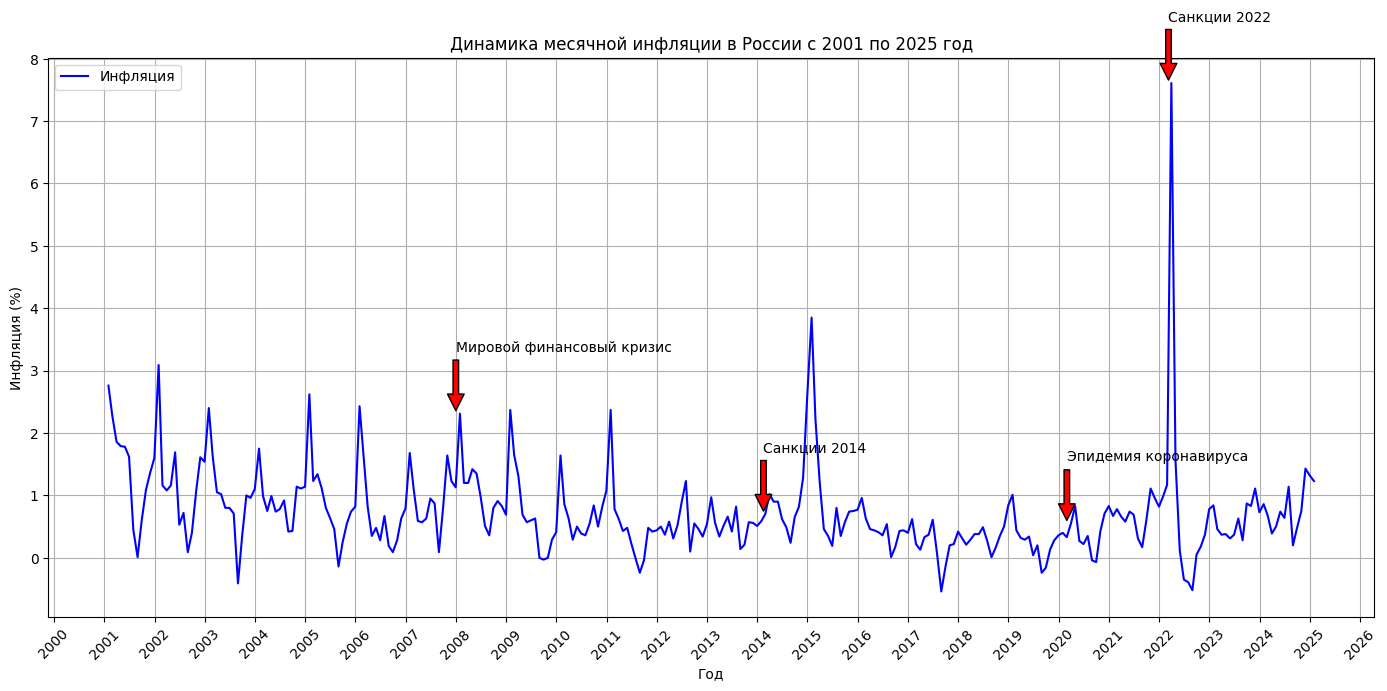

In [13]:
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Inflation'], label='Инфляция', color='blue')
plt.title('Динамика месячной инфляции в России с 2001 по 2025 год')
plt.xlabel('Год')
plt.ylabel('Инфляция (%)')
plt.grid(True)
plt.legend()

events = {
    '2008-01-01': 'Мировой финансовый кризис',
    '2014-02-15': 'Санкции 2014',
    '2020-03-01': 'Эпидемия коронавируса',
    '2022-03-10': 'Санкции 2022'
}
for date, label in events.items():
    date = pd.to_datetime(date)
    value = df[df['Date'].dt.strftime('%Y-%m') == date.strftime('%Y-%m')]['Inflation'].mean()
    plt.annotate(label, xy=(date, value), xytext=(date, value + 1),
                 arrowprops=dict(facecolor='red', shrink=0.05))

plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator())
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Отметил на гарфике два пика, крайне маловероятно, что модель смогла бы уловить такие тенденции в данных по месячной инфляции, так как это сугубо геополитические факторы. Что интересно, с 2001 по 2011 год мы можем увидеть, то что диапазон месячной инфляции был достаточно большим от -0.2% до 3% и это были стабильные значения, но во второй половине 2011 года мы можем заметить дефляцию в районе -0.2% и затем, месячная инфляция переходит  в более узкий диапазон с отдельными аномальными скачками, которые я отметил.

### Brent

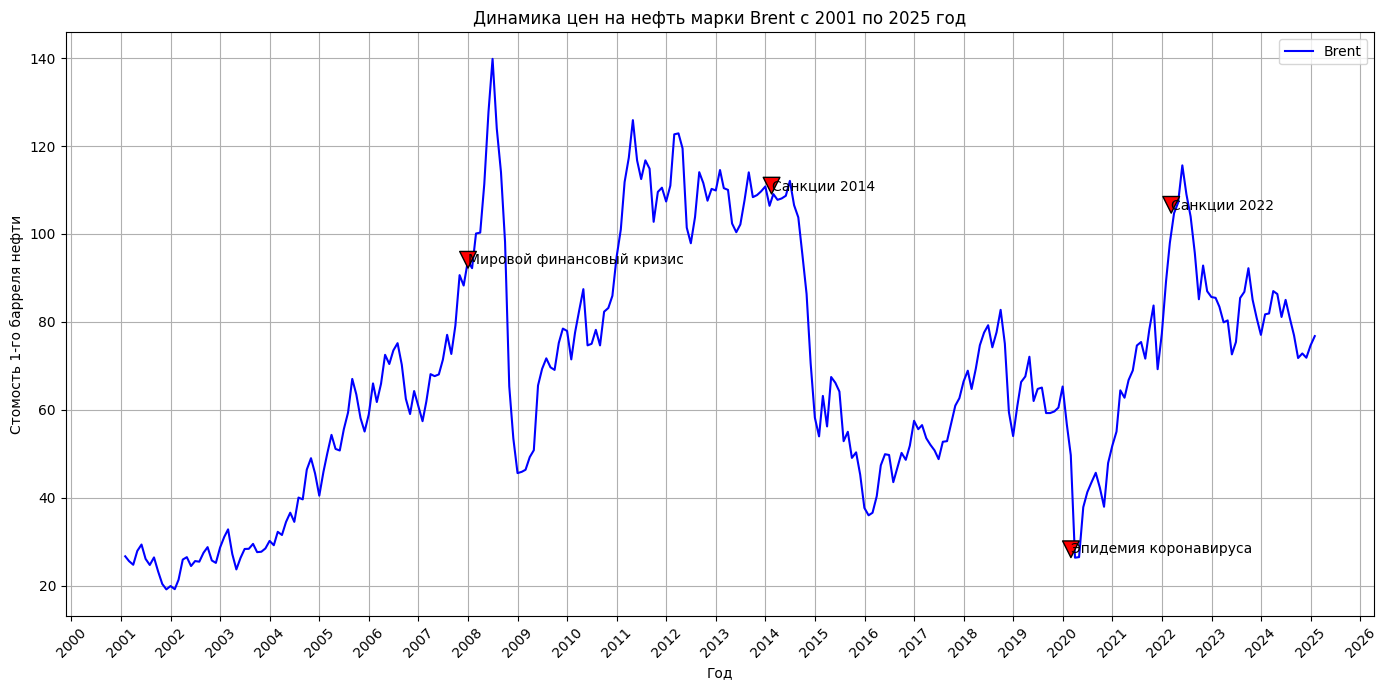

In [14]:
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Brent'], label='Brent', color='blue')
plt.title('Динамика цен на нефть марки Brent с 2001 по 2025 год')
plt.xlabel('Год')
plt.ylabel('Стомость 1-го барреля нефти')
plt.grid(True)
plt.legend()

events = {
    '2008-01-01': 'Мировой финансовый кризис',
    '2014-02-15': 'Санкции 2014',
    '2020-03-01': 'Эпидемия коронавируса',
    '2022-03-10': 'Санкции 2022'
}
for date, label in events.items():
    date = pd.to_datetime(date)
    value = df[df['Date'].dt.strftime('%Y-%m') == date.strftime('%Y-%m')]['Brent'].mean()
    plt.annotate(label, xy=(date, value), xytext=(date, value + 1),
                 arrowprops=dict(facecolor='red', shrink=0.05))

plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator())
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Глядя на график изменения цены нефти марки Brent, можно уидеть, что нефть реагирует на потрясениия немного дольше. Стомость нефти не имеет прямого влияния на инфляцию в стране, но так как Россия является крупным экспортером нефти, возможно модель машинного обучения сможет найти какие-то связи. По большей части, цена нефти влияет на стомость рубля, что в свою очередь влияет на инфляцию.

### Индекс Мосбиржи

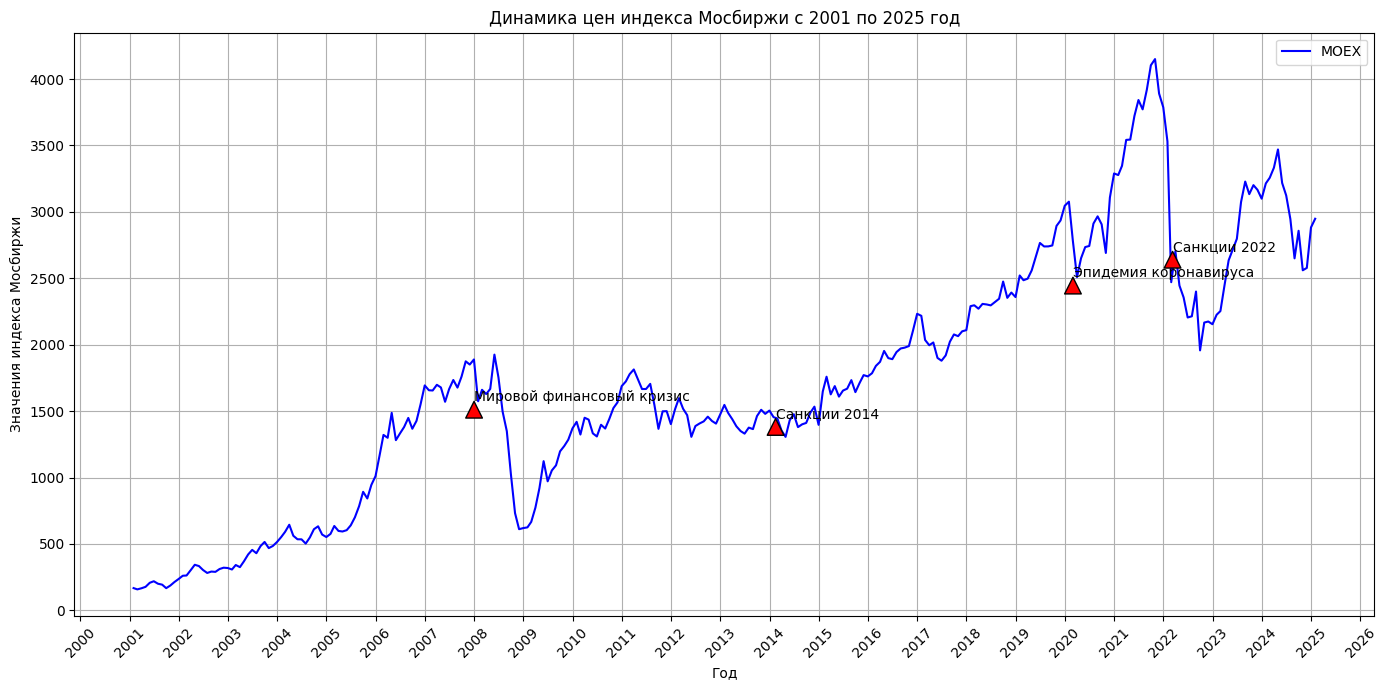

In [15]:
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['MOEX'], label='MOEX', color='blue')
plt.title('Динамика цен индекса Мосбиржи с 2001 по 2025 год')
plt.xlabel('Год')
plt.ylabel('Значения индекса Мосбиржи')
plt.grid(True)
plt.legend()

events = {
    '2008-01-01': 'Мировой финансовый кризис',
    '2014-02-15': 'Санкции 2014',
    '2020-03-01': 'Эпидемия коронавируса',
    '2022-03-10': 'Санкции 2022'
}
for date, label in events.items():
    date = pd.to_datetime(date)
    value = df[df['Date'].dt.strftime('%Y-%m') == date.strftime('%Y-%m')]['MOEX'].mean()
    plt.annotate(label, xy=(date, value), xytext=(date, value + 1),
                 arrowprops=dict(facecolor='red', shrink=0.05))

plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator())
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Интересно, теория о том, что фондовый рынок может служить опережающим фактором для прогнозировании макроэкономической обстановки в стране, является достоверной. Мы можем заметить, что индекс бенчмарка действительно начинал реагировать на возможные негативные события чуть-раньше, чем они произошли. Возможно, благодаря индексу ММВБ мы дейсвтительно сможем прогнозировать инфляцию более точно.

### Стомость рубля

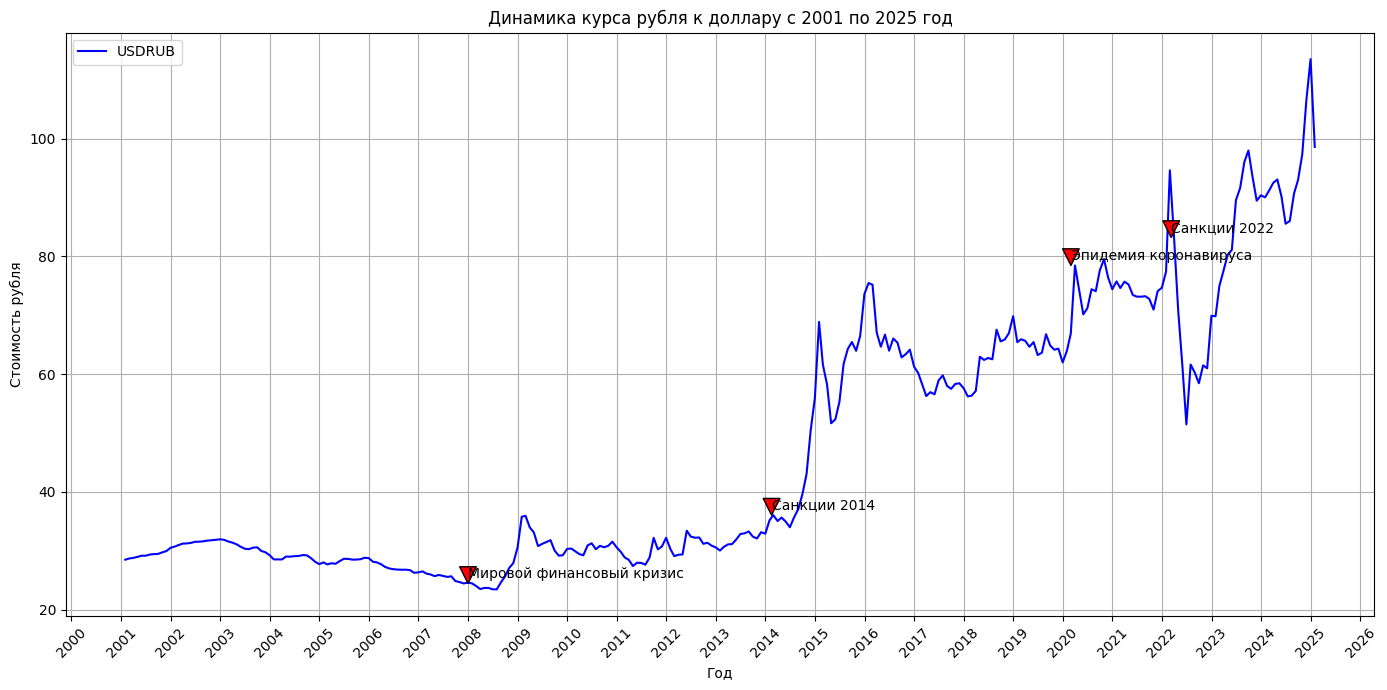

In [16]:
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Exchange_Rate'], label='USDRUB', color='blue')
plt.title('Динамика курса рубля к доллару с 2001 по 2025 год')
plt.xlabel('Год')
plt.ylabel('Стоимость рубля')
plt.grid(True)
plt.legend()

events = {
    '2008-01-01': 'Мировой финансовый кризис',
    '2014-02-15': 'Санкции 2014',
    '2020-03-01': 'Эпидемия коронавируса',
    '2022-03-10': 'Санкции 2022'
}
for date, label in events.items():
    date = pd.to_datetime(date)
    value = df[df['Date'].dt.strftime('%Y-%m') == date.strftime('%Y-%m')]['Exchange_Rate'].mean()
    plt.annotate(label, xy=(date, value), xytext=(date, value + 1),
                 arrowprops=dict(facecolor='red', shrink=0.05))

plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator())
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

В целом, как я и говорил, цена нефти марки Brent и стомость рубля сильно связаны, дорожает нефть, рубль становится крепче, что в свою очередь влияет на инфляцию. Стомость рубля, также как и нефти, изменяется с небольшим опозданием.

### Денежная масса M2

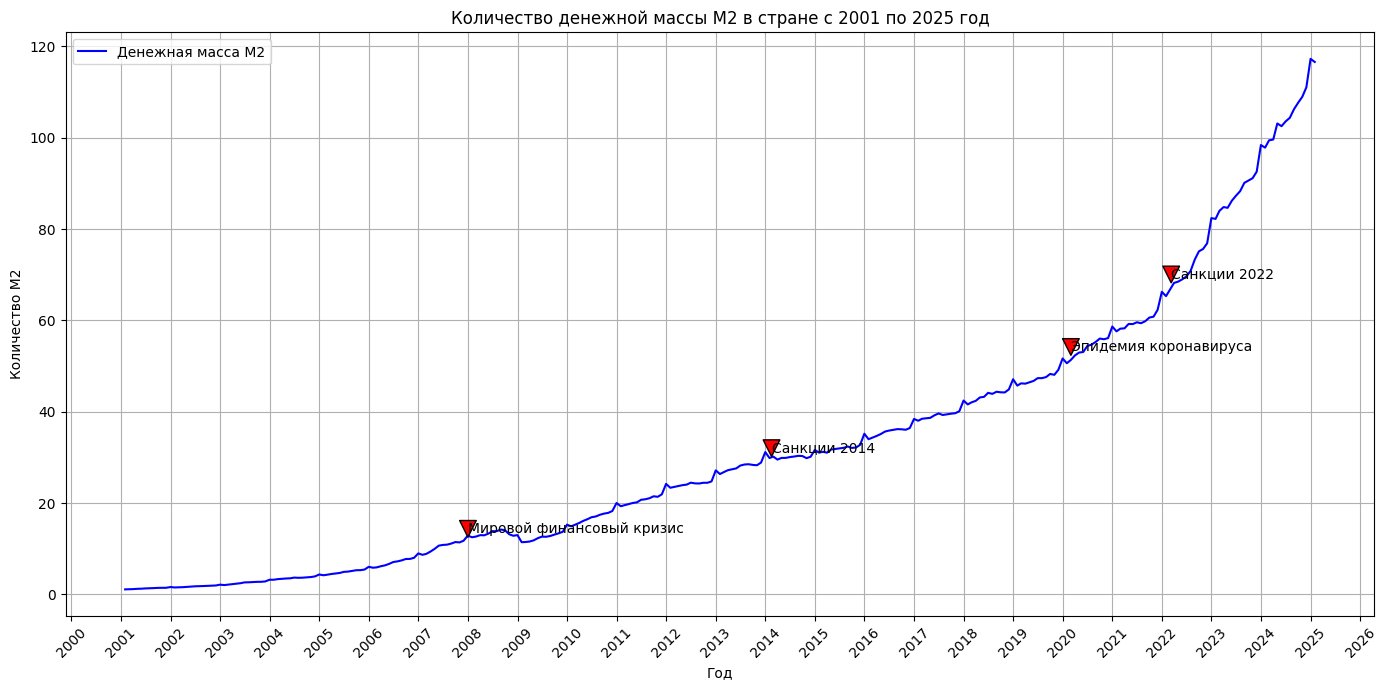

In [17]:
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['M2'], label='Денежная масса М2', color='blue')
plt.title('Количество денежной массы М2 в стране с 2001 по 2025 год')
plt.xlabel('Год')
plt.ylabel('Количество М2')
plt.grid(True)
plt.legend()

events = {
    '2008-01-01': 'Мировой финансовый кризис',
    '2014-02-15': 'Санкции 2014',
    '2020-03-01': 'Эпидемия коронавируса',
    '2022-03-10': 'Санкции 2022'
}
for date, label in events.items():
    date = pd.to_datetime(date)
    value = df[df['Date'].dt.strftime('%Y-%m') == date.strftime('%Y-%m')]['M2'].mean()
    plt.annotate(label, xy=(date, value), xytext=(date, value + 1),
                 arrowprops=dict(facecolor='red', shrink=0.05))

plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator())
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Возможно, это не самый лучший параметра для прогнозирования инфляции. Наверное, это по большей части производный параметр от ключевой ставки и стомости рубля, потому что, если посмотреть на наклон линии с 2001 по 2022 год, мы видим, что денежная масса спокойно росла, следуя за инфляцией и депозитами в банке, но в 2022 ставку резко поднимают до 20% процентов и мы видим экспоненциальный рост, так как на депозитах в банках стало храниться очень большое кол-во денежной массы из-за жесткой ДКП, ну и конечно 20% годовых значительно увеличивает эту сумму год к году. Наверное, этот показатель больше про последствия высокой инфляции, а не про ее причины.

### Индекс промышленного производства

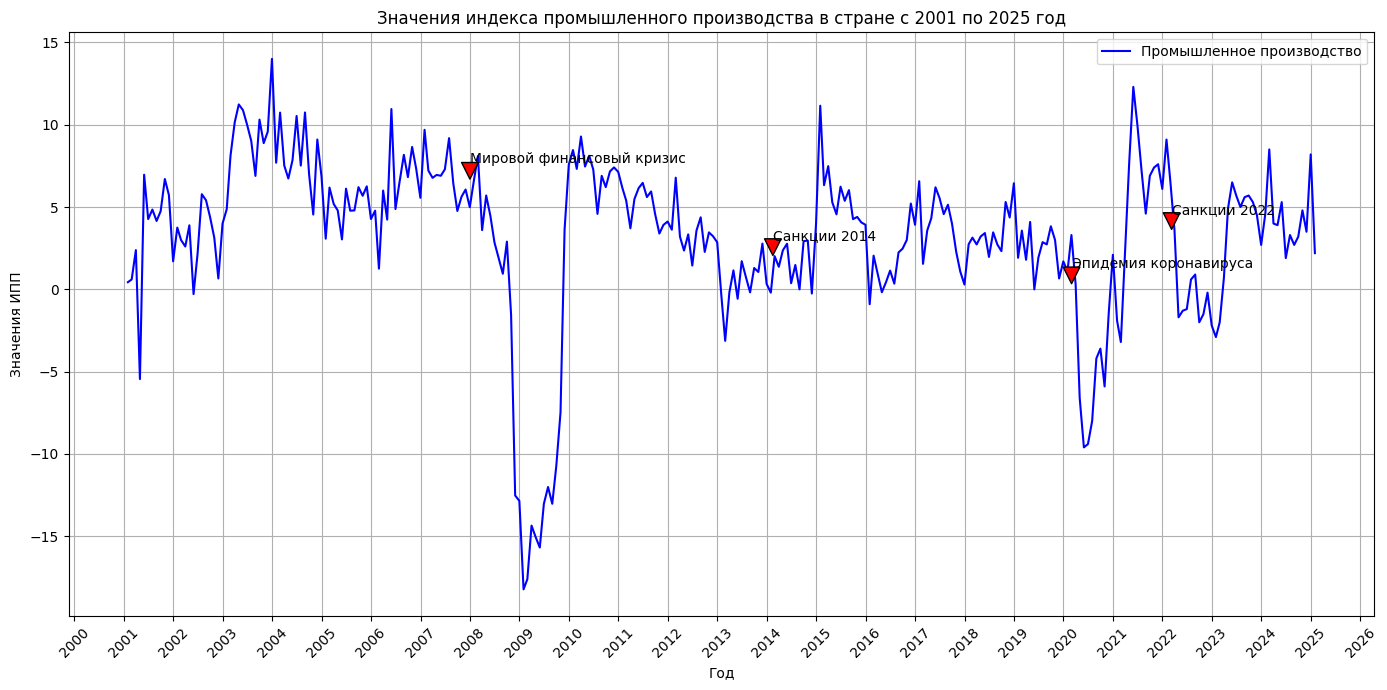

In [18]:
df['IPP'] = pd.to_numeric(df['IPP'], errors='coerce')
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['IPP'], label='Промышленное производство', color='blue')
plt.title('Значения индекса промышленного производства в стране с 2001 по 2025 год')
plt.xlabel('Год')
plt.ylabel('Значения ИПП')
plt.grid(True)
plt.legend()

events = {
    '2008-01-01': 'Мировой финансовый кризис',
    '2014-02-15': 'Санкции 2014',
    '2020-03-01': 'Эпидемия коронавируса',
    '2022-03-10': 'Санкции 2022'
}
for date, label in events.items():
    date = pd.to_datetime(date)
    value = df[df['Date'].dt.strftime('%Y-%m') == date.strftime('%Y-%m')]['IPP'].mean()
    plt.annotate(label, xy=(date, value), xytext=(date, value + 1),
                 arrowprops=dict(facecolor='red', shrink=0.05))

plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator())
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Тоже сомноваюсь в правильности выбора этого фактора, заметно, что он действует с опозданием, что в целом логично. Но, посмотрим, все же перед значимыми событиями мы видим замедление темпов производства, но, вполне возможно, что это - ложная корреляция.

### Индекс волатильности Российского рынка

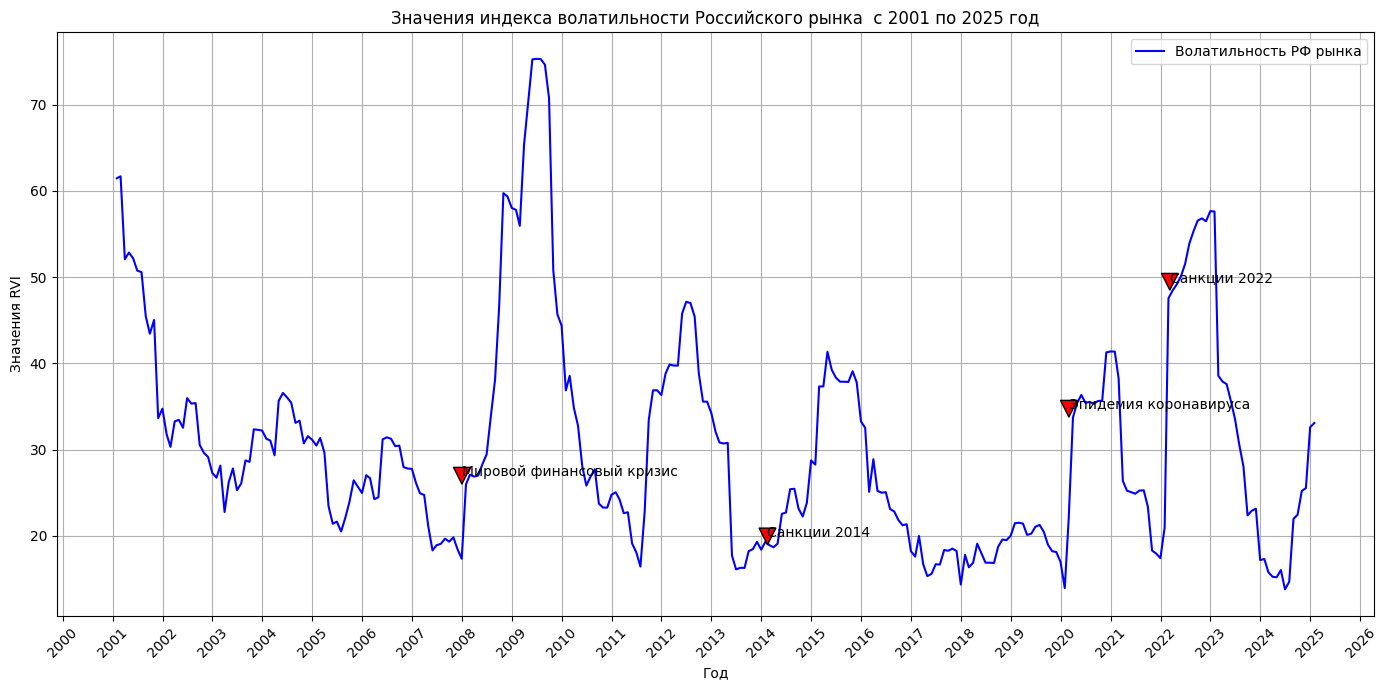

In [19]:
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['RVI'], label='Волатильность РФ рынка', color='blue')
plt.title('Значения индекса волатильности Российского рынка  с 2001 по 2025 год')
plt.xlabel('Год')
plt.ylabel('Значения RVI')
plt.grid(True)
plt.legend()

events = {
    '2008-01-01': 'Мировой финансовый кризис',
    '2014-02-15': 'Санкции 2014',
    '2020-03-01': 'Эпидемия коронавируса',
    '2022-03-10': 'Санкции 2022'
}
for date, label in events.items():
    date = pd.to_datetime(date)
    value = df[df['Date'].dt.strftime('%Y-%m') == date.strftime('%Y-%m')]['RVI'].mean()
    plt.annotate(label, xy=(date, value), xytext=(date, value + 1),
                 arrowprops=dict(facecolor='red', shrink=0.05))

plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator())
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

В целом, индекс RVI действует немного  с опозданием, но, если посмотреть под другим углом, то станет заметно, что перед значимыми событиями мы видим то, что индекс волатильности был на исторических минимумах. Так что, своего рода связь также имеется, но поможет ли она в анализе, вот это уже другой вопрос.

### Выводы

В этом блоке мы визуально рассмотрели следующие параметры: <br>
-Месячную инфляцию <br>
-Стоимость барреля нефти марки Brent <br>
-Стоимость индекса Московской биржи <br>
-Стоимость рубля <br>
-Значения денежной массы М2 <br>
-Индекс промышленного производства <br>
-Индекс волатильности Российского рынка <br>

Не могу сказать, что это достатчоное количество параметров для прогнозирвания инфляция, но, к сожалению в открытом доступе находится крайне мало макроэкономических показателей, поэтому мне пришлось выбирать из того, что можно было получить. 

Визуальный анализ показал, что мы имеем дело с достатчоно разными параметрами по влиянию на инфляцию (по скорости реакции), мои фавориты среди этих показателей:
-Стоимость барреля нефти марки Brent <br>
-Стоимость индекса Московской биржи <br>
-Стоимость рубля <br>
-Индекс волатильности Российского рынка <br>
Я бы назвал эти показатели опережающими, так как они реагирует на ситуацию на мировых рынках в первую очередь, они более гибкие и раньше реагируют на изменение обстановки в мире и стране.

В следующем блоке мы подготовим данные для передачи в модель машинного обучения.

## Подготовка данных для модели и ее обучение

Сейчас нам нужно посмотреть на корреляцию этих признаков. Думаю, что масштабированием признаков и построением модели мы займемся в Orage.

### Корреляция признаков

In [20]:
df.head(10)

,Date,Inflation,Brent,MOEX,Exchange_Rate,M2,IPP,RVI
0,2001-01-31,2.76,26.66,167.74,28.474,1.10,0.434783,61.474373
1,2001-02-28,2.28,25.57,158.10,28.672,1.12,0.601504,61.697244
2,2001-03-31,1.86,24.74,166.67,28.783,1.16,2.384292,52.080819
3,2001-04-30,1.79,27.89,177.31,28.944,1.22,-5.449591,52.861501
4,2001-05-31,1.78,29.34,207.71,29.154,1.25,6.965944,52.181679
5,2001-06-30,1.62,26.08,219.40,29.150,1.31,4.268293,50.760451
6,2001-07-31,0.45,24.69,200.64,29.353,1.34,4.848485,50.591781
7,2001-08-31,0.01,26.41,193.72,29.425,1.38,4.154303,45.490811
8,2001-09-30,0.60,23.26,167.33,29.462,1.43,4.747774,43.447233
9,2001-10-31,1.09,20.37,187.41,29.728,1.45,6.703911,45.050144


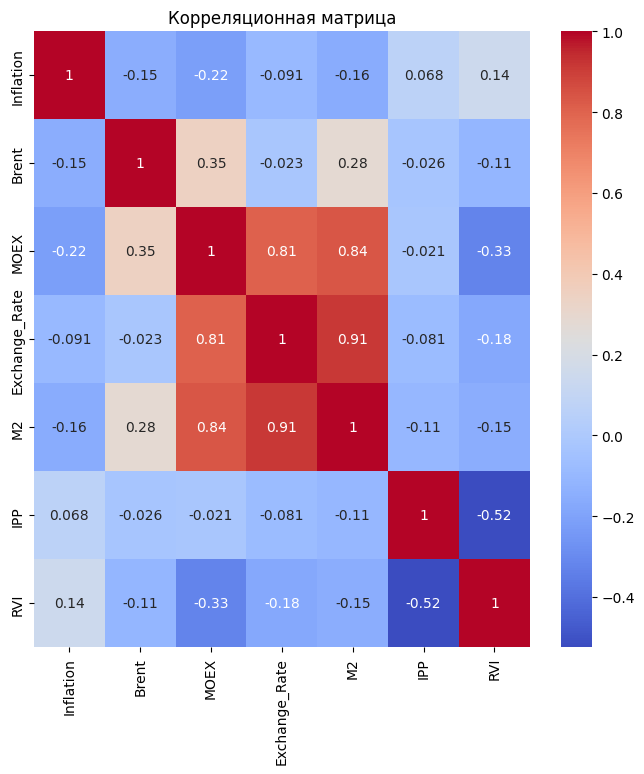

In [21]:
digits = df[['Inflation','Brent', 'MOEX', 'Exchange_Rate', 'M2', 'IPP', 'RVI']]
correlation_matrix = digits.corr()

plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

Заметно, что у нас есть выоская корреляция между некоторыми признаками, проверю это.

In [22]:
X = df[['Exchange_Rate', 'MOEX', 'M2']]

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data.head(10)

,Feature,VIF
0,Exchange_Rate,15.679527
1,MOEX,13.405335
2,M2,8.611195


In [23]:
df_new = df.drop(columns=['Exchange_Rate', 'MOEX'])
df_new.head()

,Date,Inflation,Brent,M2,IPP,RVI
0,2001-01-31,2.76,26.66,1.10,0.434783,61.474373
1,2001-02-28,2.28,25.57,1.12,0.601504,61.697244
2,2001-03-31,1.86,24.74,1.16,2.384292,52.080819
3,2001-04-30,1.79,27.89,1.22,-5.449591,52.861501
4,2001-05-31,1.78,29.34,1.25,6.965944,52.181679


Решил оставить только М2, чтобы избежать мультиколлиниарности. Думаю, что стоит перепроверить это и для других параметров.

In [24]:
X = df[['Brent', 'IPP', 'RVI', 'M2']]

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data.head(10)

,Feature,VIF
0,Brent,5.567443
1,IPP,1.377273
2,RVI,3.518636
3,M2,2.420988


Эти значения находятся в нормальном диапазоне, поэтому можно продолжать работу. Теперь мы добавим лаги для параметров и сохраним в новый файл, который затем передадим в модель.

### Добавление лагов

In [25]:
df_new['Inflation_Lag1'] = df_new['Inflation'].shift(1)
df_new['Inflation_Lag2'] = df_new['Inflation'].shift(2)
df_new['Brent_Lag1'] = df_new['Brent'].shift(1)
df_new['Brent_Lag2'] = df_new['Brent'].shift(2)
df_new['M2_Lag1'] = df_new['M2'].shift(1)
df_new['M2_Lag2'] = df_new['M2'].shift(2)
df_new['IPP_Lag1'] = df_new['IPP'].shift(1)
df_new['IPP_Lag2'] = df_new['IPP'].shift(2)
df_new['RVI_Lag1'] = df_new['RVI'].shift(1)
df_new['RVI_Lag2'] = df_new['RVI'].shift(2)

df_new = df_new.dropna()

df_new.to_csv('inflation_dataset_with_lags.csv', index=False)
df_new.head(10)

,Date,Inflation,Brent,M2,IPP,RVI,Inflation_Lag1,Inflation_Lag2,Brent_Lag1,Brent_Lag2,M2_Lag1,M2_Lag2,IPP_Lag1,IPP_Lag2,RVI_Lag1,RVI_Lag2
2,2001-03-31,1.86,24.74,1.16,2.384292,52.080819,2.28,2.76,25.57,26.66,1.12,1.10,0.601504,0.434783,61.697244,61.474373
3,2001-04-30,1.79,27.89,1.22,-5.449591,52.861501,1.86,2.28,24.74,25.57,1.16,1.12,2.384292,0.601504,52.080819,61.697244
4,2001-05-31,1.78,29.34,1.25,6.965944,52.181679,1.79,1.86,27.89,24.74,1.22,1.16,-5.449591,2.384292,52.861501,52.080819
5,2001-06-30,1.62,26.08,1.31,4.268293,50.760451,1.78,1.79,29.34,27.89,1.25,1.22,6.965944,-5.449591,52.181679,52.861501
6,2001-07-31,0.45,24.69,1.34,4.848485,50.591781,1.62,1.78,26.08,29.34,1.31,1.25,4.268293,6.965944,50.760451,52.181679
7,2001-08-31,0.01,26.41,1.38,4.154303,45.490811,0.45,1.62,24.69,26.08,1.34,1.31,4.848485,4.268293,50.591781,50.760451
8,2001-09-30,0.60,23.26,1.43,4.747774,43.447233,0.01,0.45,26.41,24.69,1.38,1.34,4.154303,4.848485,45.490811,50.591781
9,2001-10-31,1.09,20.37,1.45,6.703911,45.050144,0.60,0.01,23.26,26.41,1.43,1.38,4.747774,4.154303,43.447233,45.490811
10,2001-11-30,1.36,19.14,1.45,5.726257,33.661336,1.09,0.60,20.37,23.26,1.45,1.43,6.703911,4.747774,45.050144,43.447233
11,2001-12-31,1.60,19.90,1.61,1.703801,34.759498,1.36,1.09,19.14,20.37,1.45,1.45,5.726257,6.703911,33.661336,45.050144


Добавил лаги для всех признаков, чтобы модели было проще находить зависимость между ними, так как данные зависят от своих прошлых показателей.

### Разделение датасета на тестовую и тренировочную выборки

In [26]:
df = df_new

train_size = int(len(df) * 0.8)
train_data = df[:train_size]
test_data = df[train_size:]


train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

In [ ]:
Разделил данные на тренировочную и тестовую в соотношении 80/20 процентов соответственно.

### Построение модели

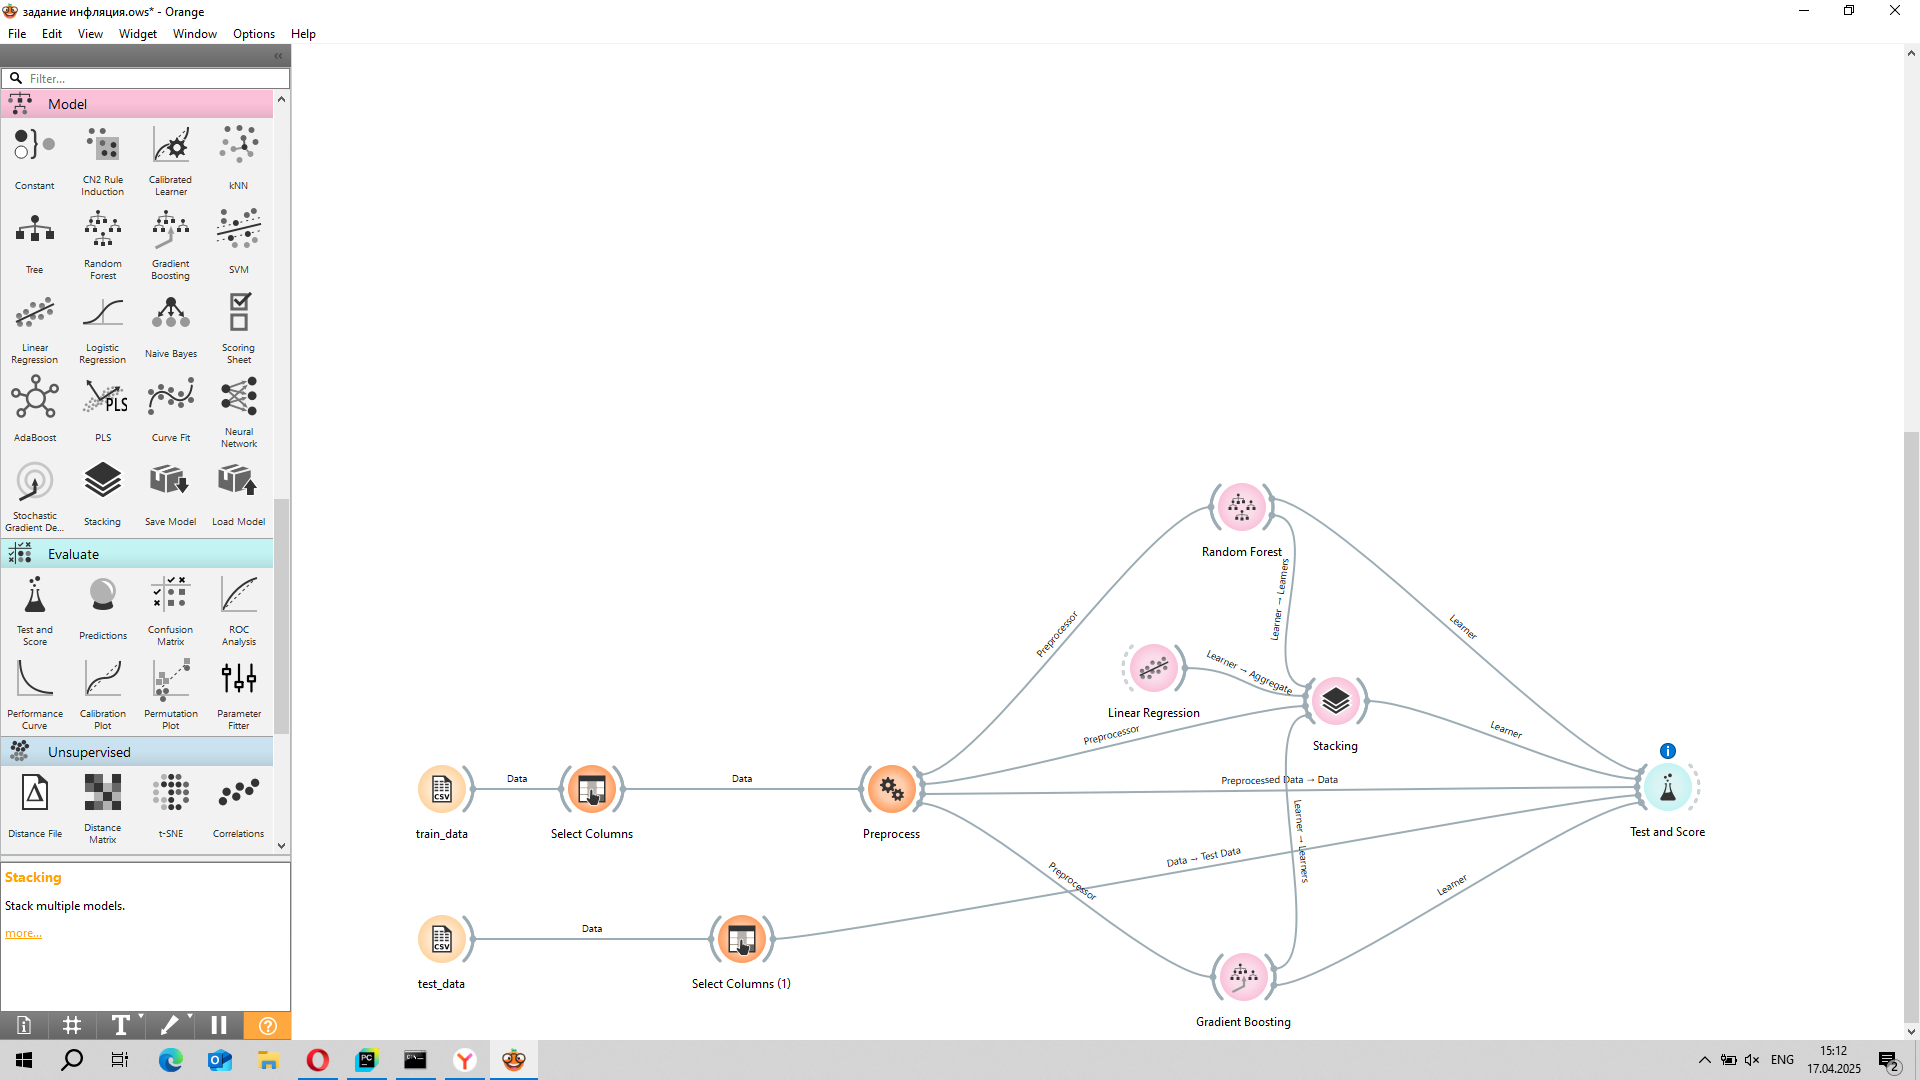

На этом скриншоте вы можете увидеть готовую модель для прогнозирования инфляции. 

Она включает в себя: <br>
-два датасета, тренировочный и тестовый; <br>
-виджеты для выбора колонок; <br>
-виджет подготовки признаков для передачи в модель; <br>
-3 вида моделей машинного обучения, gradient boosting и random forest - основные модели, а линейная регрессия используются для стакинга; <br>
-виджет для вывода метрик по моделям; <br>

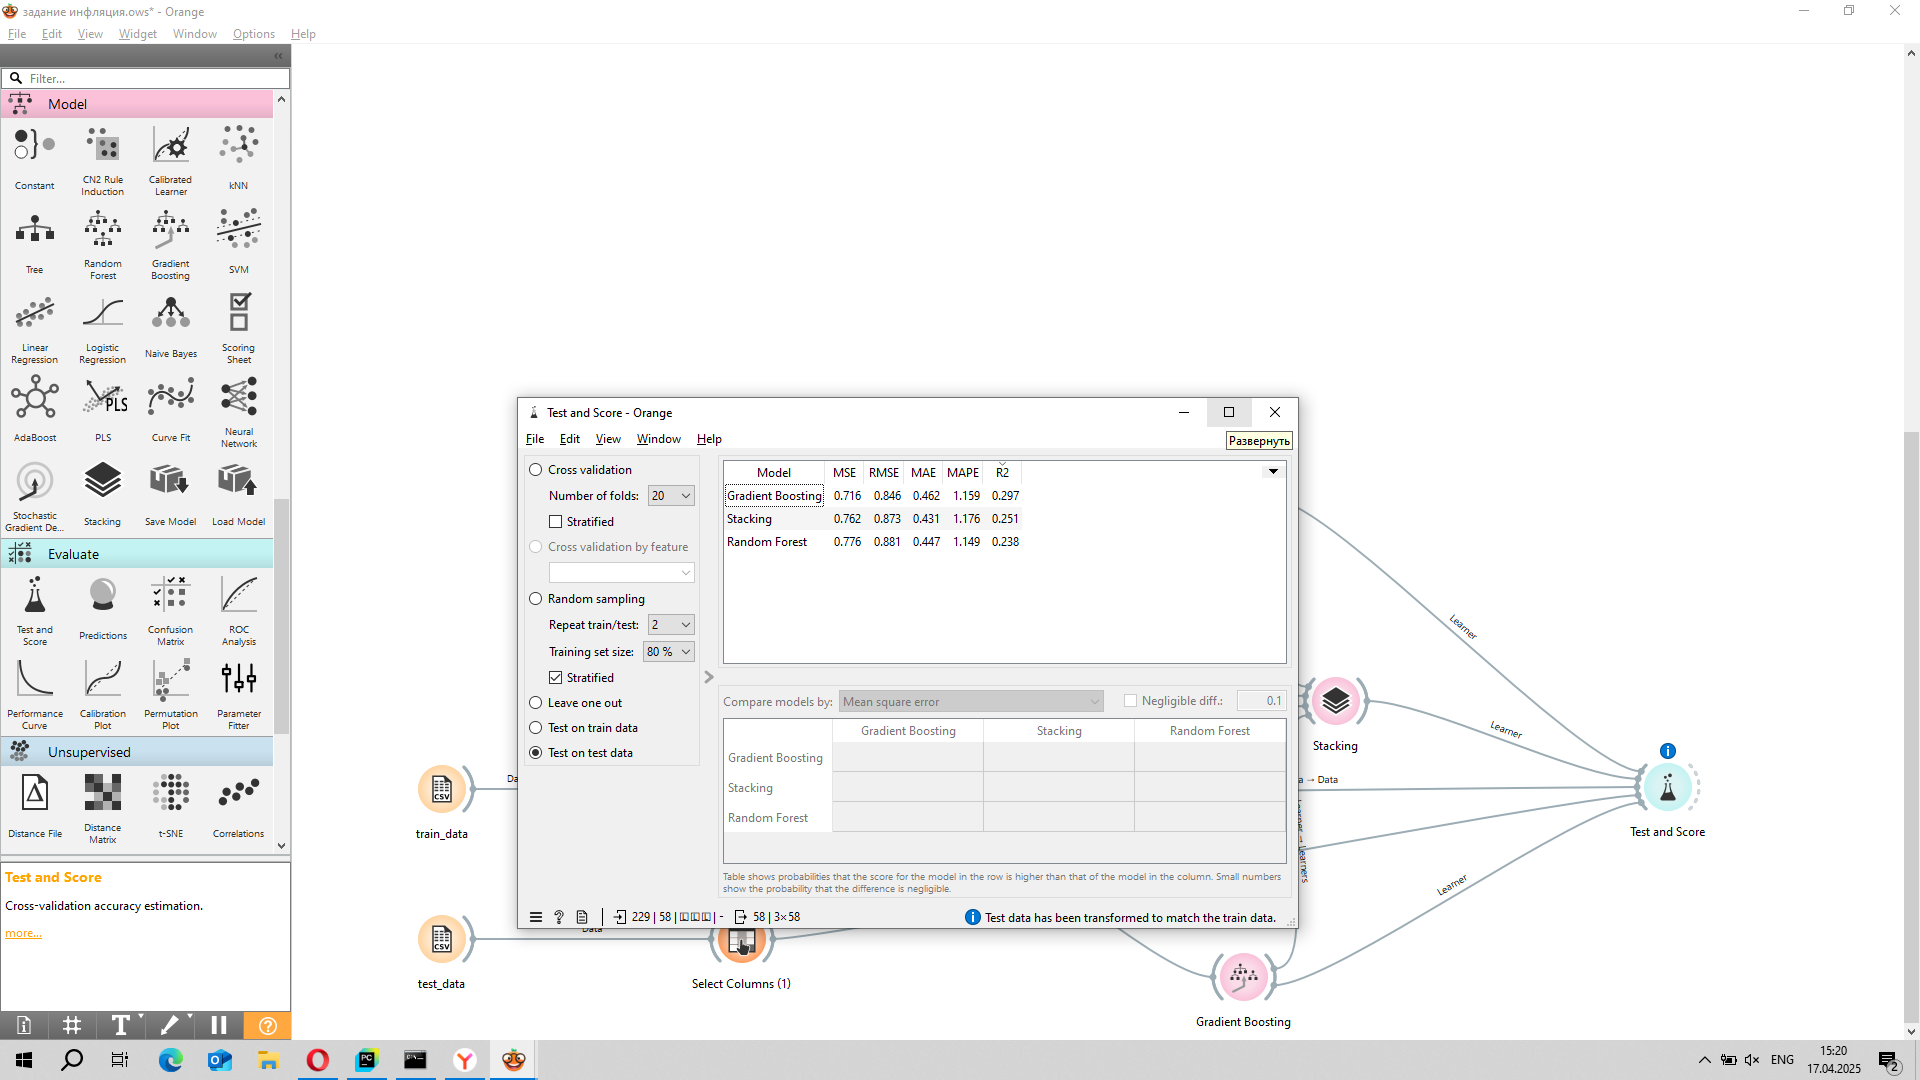

На данном скриншоте вы можете увидеть метрики для моделей. Хорошими их не назвать, бесспорно. 

### Выводы

Нашим заданием было построить модель для прогнозирования инфляции, в задании было сказано, что мы должны прогнозировать инфляцию, опираясь на ее исторические данные. Я посчитал достаточно интересным добавить другие признаки, от которых может зависить инфляция (к сожалению, в интернете очень мало макроэкономических показателей, к тому же с большой историей, поэтому пришлось выбирать из того, что было), вот они: 

1.Ежемесячная инфляция в России с 2001 по 2025 года; <br>
2.Цена нефти марки Brent; <br>
3.Индекс Москвоской биржи; <br>
4.Стомость рубля по отношению к доллару; <br>
5.Индекс промышленного производства; <br>
6.Денежная масса М2; <br>
7.Индекс волатильности Российского рынка; <br>

В процессе подготовки данных к передаче в модель машинного обучения (проверял признаки на корреляцию) мне пришлось отбросить несколько признаков: Индекс Москвоской биржи и Стомость рубля по отношению к доллару, так как они сильно коррелировали между собой. Затем к оставшимся признакам я добавил лаги, так как они зависят от своих прошлых значений. 

Построение моделей прошло довольно гладко, я выбрал эти модели, так как они лучше подхоядят для специфики проекта. К сожалению, результаты нельзя назвать хорошими, но я считаю, что из этих данных и моделей можно выжать больше. У меня есть несколько гипотез по поводу того, почему я не смог построить качественную модель:

-слабая база в построении ML; <br>
-мало дополнительных параметров для прогнозирования; <br>
-ограниченный инструментарий в Orange(на питоне можно было бы применить Optuna для настройки параметров моделей) <br>